In [1]:
import CanonicalBip
import pandas as pd

In [2]:
Data = pd.read_csv('/Users/victor/Documents/DataLab/2018/ML_test/data/train.csv')

In [3]:
Data = Data.fillna(Data.mean())
X = Data.iloc[:,:-1]
target = list(Data.num)
col_names = X.columns
Group = list(set(target))

In [4]:
BCan = CanonicalBip.CanonicalBip(data=X,dim=9,GroupNames=Group,y=target)

In [5]:
BCan.CanonicalBip(method=1)

In [6]:
import bipplot

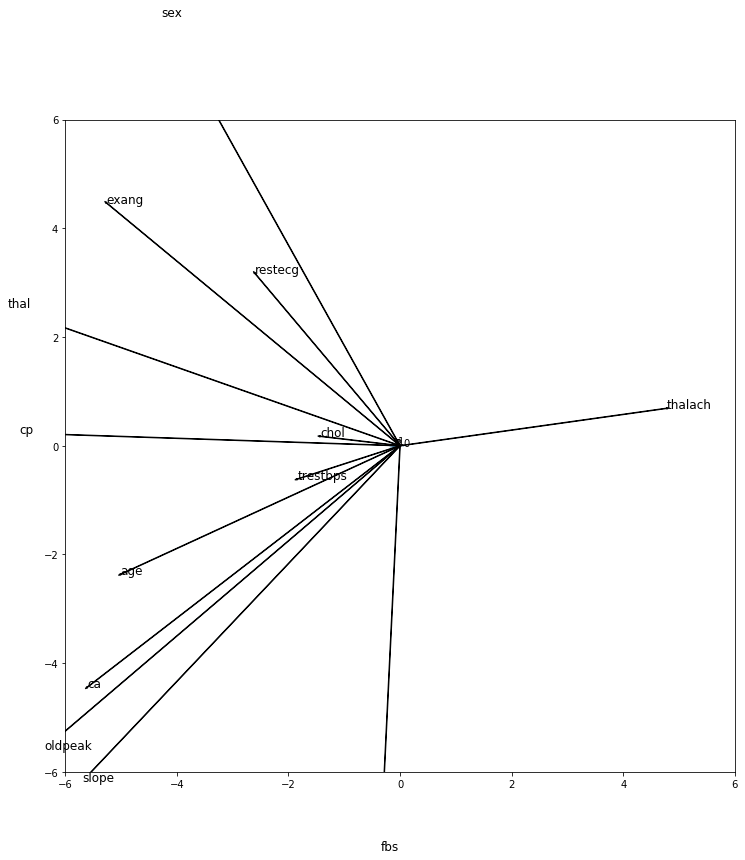

In [7]:
bipplot.plot(BCan, figx = 12, figy = 12, xlim = [-6,6], ylim = [-6,6], arrow_width = 0.01)

In [8]:
import Feature_selection
import numpy as np

In [43]:
T = Feature_selection.Feature_selection(BCan,target=np.array(target),thr_dis=75,thr_corr=0.9, type_cor="coord")

In [44]:
T.var_sel

['age',
 'cp',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [64]:
var_class = ['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_class = Data[var_class]
X_canon = Data[T.var_sel]

In [75]:
X_train_cla, X_test_cla, y_train_cla, y_test_cla = train_test_split(X_class, target, test_size=0.3, random_state=1)
X_train_can, X_test_can, y_train_can, y_test_can = train_test_split(X_canon, target, test_size=0.3, random_state=1)

In [76]:
from sklearn.linear_model import LogisticRegression
log_cla = LogisticRegression()

In [77]:
mod_cla = log_cla.fit(X_train_cla,y_train_cla)

In [78]:
from sklearn import metrics

In [79]:
y_score_cla = mod_cla.predict(X_test_cla)
metrics.accuracy_score(y_test_cla, y_score_cla)

0.625

In [80]:
metrics.confusion_matrix(y_test_cla, y_score_cla)

array([[45,  1,  0,  1,  0],
       [10,  2,  1,  2,  0],
       [ 1,  1,  0,  2,  0],
       [ 3,  4,  1,  3,  0],
       [ 0,  0,  1,  2,  0]])

In [81]:
log_can = LogisticRegression()
mod_can = log_can.fit(X_train_can,y_train_can)
y_score_can = mod_can.predict(X_test_can)
metrics.accuracy_score(y_test_can, y_score_can)

0.67500000000000004

In [74]:
metrics.confusion_matrix(y_test_can, y_score_can)

array([[46,  0,  2,  0,  0],
       [10,  3,  3,  1,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  2,  1,  2,  2],
       [ 0,  2,  0,  2,  0]])